**Installing Necessary Libraries**

In [1]:
!pip install mat4py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mat4py import loadmat
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Function to Read Data File**

In [3]:
def BT19ECE089_dataset_div_shuffle(dir_path,split_ratio):
    #CSV XLS MAT
    if(dir_path.endswith('.csv')):
        data = pd.read_csv(dir_path)
    elif(dir_path.endswith('.xls')):
        data = pd.read_excel(dir_path)
    elif(dir_path.endswith('.mat')):
        data = loadmat(dir_path)
    else:
        print("Invalid datatype. Select .csv or .xls or .mat file")
        
    train_data , test_data = train_test_split(data,train_size = split_ratio,shuffle = True)
    
    return train_data , test_data 

**Arranging the data frame to get dependent(y) and independent variables(x)**

In [4]:
data = loadmat('/content/Matlab_accidents.mat')

data_accidents = data['accidents']
#datax = data_accidents[0][2]
'statelabel', 'hwydata', 'hwyheaders'
df = pd.DataFrame(data_accidents['hwydata'],columns = data_accidents['hwyheaders'])
states = [y[0] for y in data_accidents["statelabel"]]
df.insert(loc = 0,column = 'States',value = states)
# df.head()
df = pd.DataFrame([df['Traffic fatalities'],df['Licensed drivers (thousands)'],df['Registered vehicles (thousands)'],df['Vehicle-miles traveled (millions)']]).transpose()

**Normalizing and Splitting the data into train and test**

In [6]:
for column in df:
  df[column] = df[column]/np.amax(df[column])
train , test = train_test_split(df,train_size = 0.7,shuffle = True)

**Creating theta matrix and y for training and testing**

In [7]:
y_train = np.array(train.iloc[:, 0])
y_train = y_train.reshape([35,1])
x_train = np.array(train.iloc[:, 1:])
on_train = np.ones([train.shape[0],1])
theta_train = np.hstack((on_train,x_train))

y_test = np.array(test.iloc[:, 0])
x_test = np.array(test.iloc[:, 1:])
# x_test = x_test /  np.amax(x_test)
# y_test = y_test /  np.amax(y_test)
on_test = np.ones([test.shape[0],1])
y_test = y_test.reshape([y_test.shape[0],1])
theta_test = np.hstack((on_test,x_test))

**Calculating optimum weights (using pseudo inverse) and predicting output**

In [8]:
weight_opt = np.matmul(np.linalg.pinv(theta_train),y_train)
# weight_opt.shape
y_pred = np.matmul(theta_test,weight_opt)

**Plotting ground truth and predicted outputs**

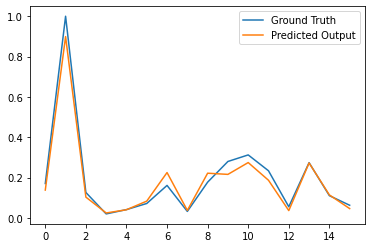

In [15]:
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Ground Truth','Predicted Output'])

**Calculating mean squared error , root mean squared error and mean absolute error**

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
print(mse,rmse,mae)

0.0016484915795305277 0.04060162040523171 0.0297834829376438


In [30]:
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)
print("Mean Absolute Error: ",mae)

Mean Squared Error:  0.0016484915795305277
Root Mean Squared Error:  0.04060162040523171
Mean Absolute Error:  0.0297834829376438


# **Finding optimum weights using Gradiend Descent**

**Randomly initialising weights**

In [31]:
grad_weights = np.random.randn(len(theta_train[0]), 1)
# grad_weights.shape

**Implementing Gradient Descent and predicting output**

In [32]:
iterations = 1000
learning_rate = 0.03

for i in range(iterations):
  delta_e = np.matmul(theta_train.transpose(),(np.matmul(theta_train,grad_weights)-y_train))
  grad_weights = grad_weights - learning_rate * delta_e 
ygrad_pred = np.matmul(theta_test,grad_weights)

**Plotting ground truth and predicted outputs**

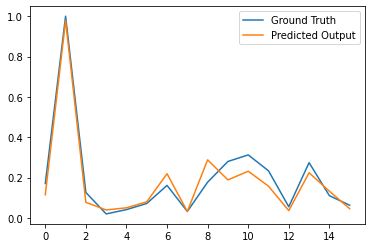

In [33]:
plt.plot(y_test)
plt.plot(ygrad_pred)
plt.legend(['Ground Truth','Predicted Output'])

**Calculating mean squared error , root mean squared error and mean absolute error**

In [34]:
mse_g = mean_squared_error(y_test, ygrad_pred)
rmse_g = mean_squared_error(y_test, ygrad_pred, squared = False)
mae_g = mean_absolute_error(y_test, ygrad_pred)
print(mse_g,rmse_g,mae_g)

0.002906374104840904 0.05391079766466922 0.043063532175202424


In [35]:
print("Mean Squared Error: ",mse_g)
print("Root Mean Squared Error: ",rmse_g)
print("Mean Absolute Error: ",mae_g)

Mean Squared Error:  0.002906374104840904
Root Mean Squared Error:  0.05391079766466922
Mean Absolute Error:  0.043063532175202424


# Changing relationship between input and output variables 

**Recalculating Theta matrix**

In [36]:
theta_train_dash = np.hstack((on_train,np.reshape(np.square(x_train.T[0]).T,(35,1)),x_train))
theta_test_dash = np.hstack((on_test,np.reshape(np.square(x_test.T[0]).T,(16,1)),x_test))
# theta_train_dash.shape

**Calculating optimum weights (using pseudo inverse) and predicting output**

In [37]:
weight_opt_dash = np.matmul(np.linalg.pinv(theta_train_dash),y_train)
# weight_opt.shape
y_pred_dash = np.matmul(theta_test_dash,weight_opt_dash)

**Plotting ground truth and predicted outputs**

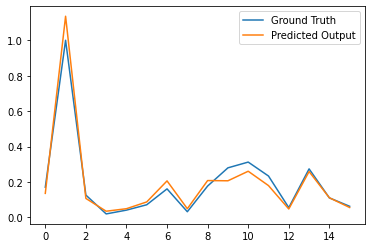

In [38]:
plt.plot(y_test)
plt.plot(y_pred_dash)
plt.legend(['Ground Truth','Predicted Output'])

**Calculating mean squared error , root mean squared error and mean absolute error**

In [39]:
mse_dash = mean_squared_error(y_test, y_pred_dash)
rmse_dash = mean_squared_error(y_test, y_pred_dash, squared = False)
mae_dash = mean_absolute_error(y_test, y_pred_dash)
print(mse_dash,rmse_dash,mae_dash)

0.0021891078643436262 0.04678790297014418 0.033153048552636656


In [40]:
print("Mean Squared Error: ",mse_dash)
print("Root Mean Squared Error: ",rmse_dash)
print("Mean Absolute Error: ",mae_dash)

Mean Squared Error:  0.0021891078643436262
Root Mean Squared Error:  0.04678790297014418
Mean Absolute Error:  0.033153048552636656
